# Machine Learning Pipeline - Model Training - XGBoost


# Reproducibilidad: sembramos la semilla

Con el objetivo de garantizar la reproducibilidad entre ejecuciones del mismo notebook, pero también entre el entorno de investigación y producción, para cada paso que incluya algún elemento de aleatoriedad, es extremadamente importante que **establezcamos la semilla**

In [1]:
# Para manipulacion de datos
import pandas as pd
import numpy as np

# Para graficar
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Para guardar el modelo
import joblib

# Para construir los modelos
#Clasificación
from xgboost import XGBClassifier

# Para evaluar los modelos
from sklearn.metrics import roc_auc_score, classification_report

# Para visualizar todas las columnas del dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# cargar el conjunto de entrenamiento y el de prueba con las variables diseñadas 
# construimos y guardamos estos conjuntos de datos en el notebook anterior. 

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_disc_corr,TotalCharges_disc_corr
0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,0,2,2,2
1,1,0,0,0,1,0,0,2,2,2,2,2,2,2,0,1,3,1
2,0,0,1,0,1,1,2,0,0,1,1,0,0,0,1,1,2,2
3,1,0,1,0,1,1,2,0,1,0,1,0,0,0,1,3,0,0
4,0,0,1,0,1,1,1,1,1,1,0,0,0,2,0,2,3,3


In [3]:
# Cargamos la target

y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

,Churn
0,0
1,0
2,0
3,1
4,0


### Instanciamos el modelo de Arbol de decision: 

Recordamos sembrar la semilla.

In [5]:
# configurar el modelo 

#Instanciar
xgb = XGBClassifier(use_label_encoder=False)

xgb.fit(X_train, y_train,
        early_stopping_rounds=5,
        eval_set=[(X_test,y_test)],
        eval_metric='auc'
)

[0]	validation_0-auc:0.83616
[1]	validation_0-auc:0.83599
[2]	validation_0-auc:0.83657
[3]	validation_0-auc:0.83859
[4]	validation_0-auc:0.83858
[5]	validation_0-auc:0.84034
[6]	validation_0-auc:0.84099
[7]	validation_0-auc:0.84088
[8]	validation_0-auc:0.84150
[9]	validation_0-auc:0.84118
[10]	validation_0-auc:0.84046
[11]	validation_0-auc:0.84005
[12]	validation_0-auc:0.84094


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [6]:
# evalua el modelomos: 

# hacemos predicciones sobre el conjunto de entranamiento
pred = xgb.predict_proba(X_train)[:,1]


print('train auc: {}'.format(
    roc_auc_score(y_train, pred)))
print()

# hacemos predicciones sobre el conjunto de test
pred = xgb.predict_proba(X_test)[:,1]

# determinamos auc

print('test auc: {}'.format(
    roc_auc_score(y_test, pred)))
print()

xgb_auc={'Auc':np.round(roc_auc_score(y_test, pred),2)}

train auc: 0.8790554970623671

test auc: 0.841501976284585



In [7]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

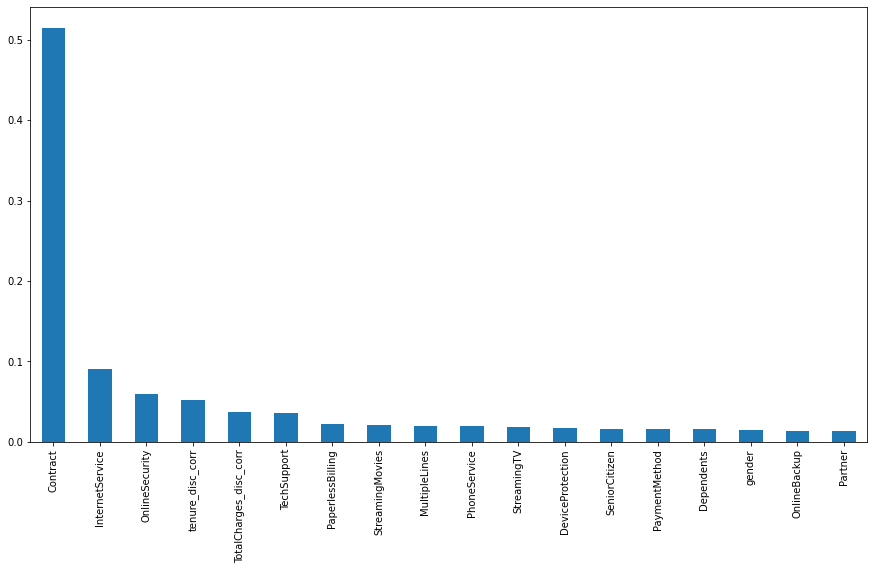

In [7]:
pd.Series(xgb.feature_importances_,index = X_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize=(15,8));

In [8]:
pd.DataFrame(xgb_auc,index=['XGBoost']).to_csv('XGBoost_auc.csv',index=False)